In [3]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(60000, 28, 28)

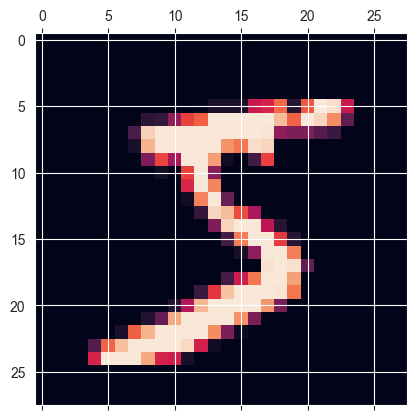

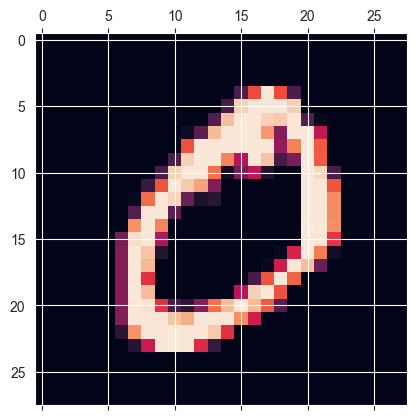

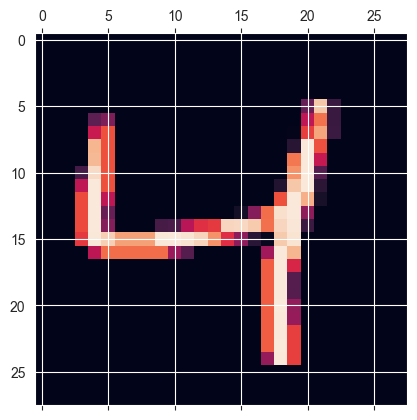

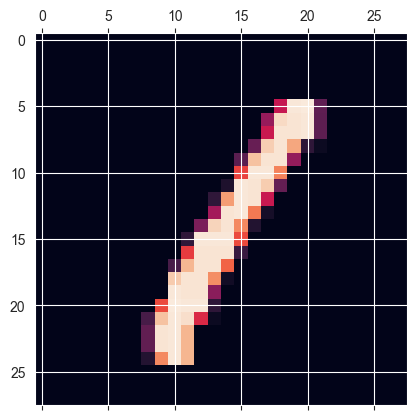

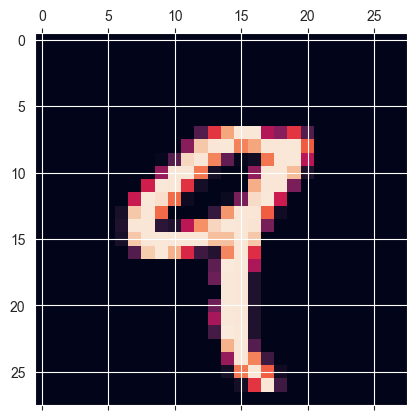

In [10]:
for image in range(5):
    plt.matshow(X_train[image])

In [21]:
#since we already divided the data into training data and test data we need the further model recog.
#ANN

X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
#-----------------(ANN)-----------------------
#Now we will be creating an ANN: Artificial Neural Network using keras sequential model
model=keras.Sequential([
    #since we do have this data into a matrix and we need this into a flattened 1D array hence to do it we will use keras flattening APIs
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    #For the output layer of 10 final classification outputs
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.1120 - loss: 2.3016
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.1124 - loss: 2.3013
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.1124 - loss: 2.3013
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.1124 - loss: 2.3013
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.1124 - loss: 2.3013


In [24]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.1135 - loss: 2.3011


[2.3011090755462646, 0.11349999904632568]

In [27]:
# accuracy is terrible
#now using CNN for the same and to calculate how good that is
#------------------(CNN)-----------------
# Build CNN model
model = models.Sequential([
    # Conv Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Conv Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Conv Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    # Flatten and Fully Connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),  # Regularization to prevent overfitting
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',  # faster convergence than SGD
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9169 - loss: 0.2723 - val_accuracy: 0.0995 - val_loss: 844.4143
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9728 - loss: 0.0886 - val_accuracy: 0.0995 - val_loss: 2037.0658
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9799 - loss: 0.0667 - val_accuracy: 0.0992 - val_loss: 303.2803
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.0995 - val_loss: 535.6910
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9834 - loss: 0.0517 - val_accuracy: 0.1050 - val_loss: 369.5919
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9853 - loss: 0.0489 - val_accuracy: 0.0995 - val_loss: 8431.0908
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9852 - loss: 0.0452 - val_accuracy: 0.0995 - val_loss: 1036.1155
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9869 